Loading data...
Cleaning data...
Splitting data...
Scaling features...
Training model...
Evaluating model...

Model Performance:
RMSE: 902480.14
R² Score: 0.2864

Feature Importances:
           Feature  Importance
0         Fin_sqft    0.479929
1          Lotsize    0.313004
2     Property_Age    0.198618
3  Total_Bathrooms    0.008450


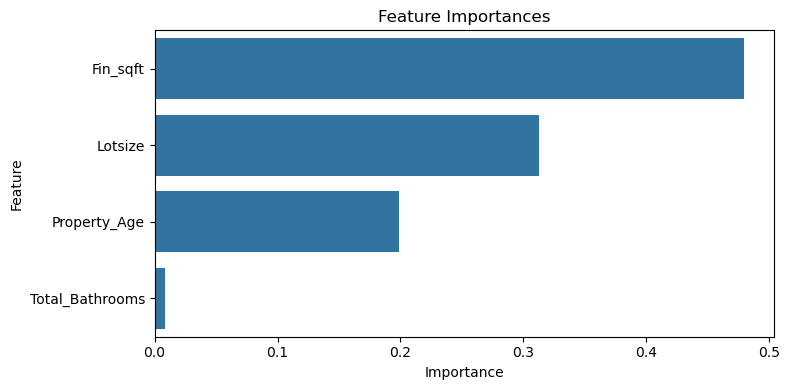

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select only the most important features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training model...")
# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,  # Very small number for quick training
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

model.fit(X_train_scaled, y_train)

print("Evaluating model...")
# Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

print("\nFeature Importances:")
# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...
Training model...
Evaluating model...

Model Performance:
RMSE: 902480.14
R² Score: 0.2864

Feature Importances:
           Feature  Importance
0         Fin_sqft    0.479929
1          Lotsize    0.313004
2     Property_Age    0.198618
3  Total_Bathrooms    0.008450


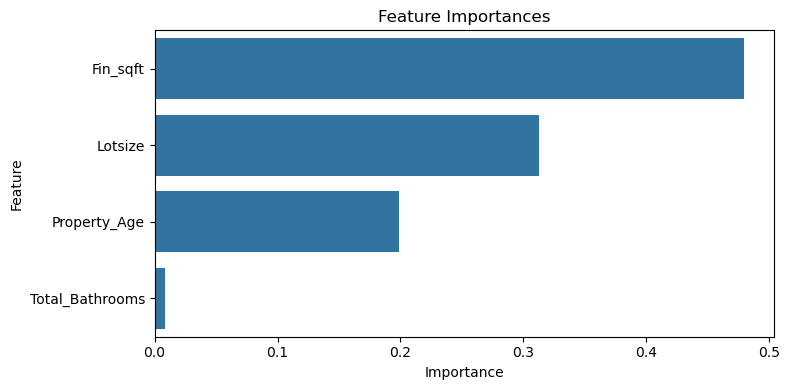

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select only the most important features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training model...")
# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,  # Very small number for quick training
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

model.fit(X_train_scaled, y_train)

print("Evaluating model...")
# Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

print("\nFeature Importances:")
# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...

Training and evaluating models...

Training Linear Regression...

Feature Coefficients:
           Feature    Coefficient
0         Fin_sqft  763451.864491
5          Stories   59453.429428
3  Total_Bathrooms   35359.995754
2     Property_Age    1371.418759
4            Bdrms    -511.770505
1          Lotsize  -34085.294159
RMSE: 846428.65
R² Score: 0.3723

Training Ridge Regression...
RMSE: 846411.35
R² Score: 0.3723

Training Lasso Regression...
RMSE: 846428.11
R² Score: 0.3723

Model Comparison:
               Model           RMSE  R² Score
0  Linear Regression  846428.648915  0.372307
1   Ridge Regression  846411.345321  0.372333
2   Lasso Regression  846428.109083  0.372308


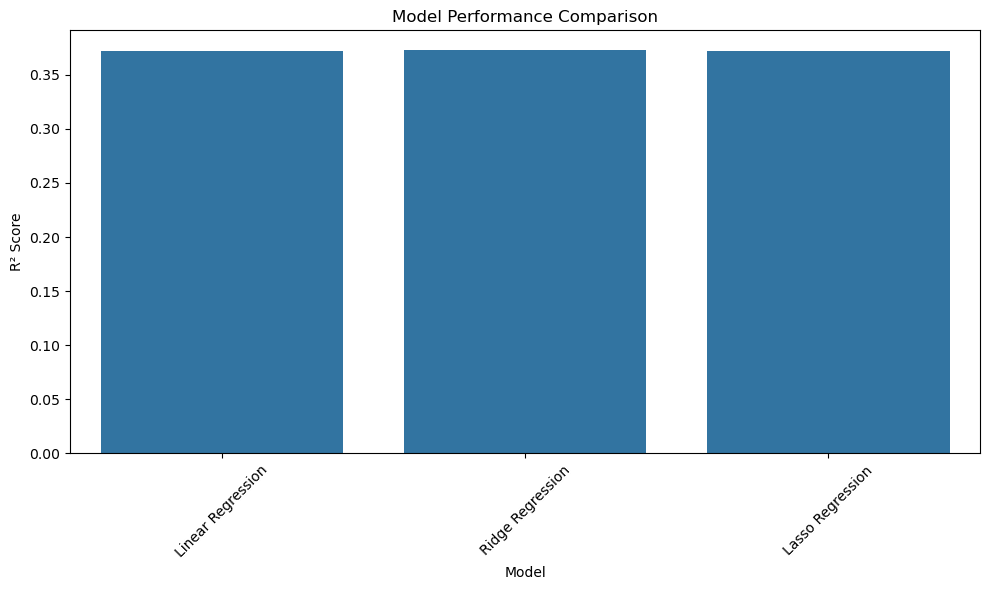

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

print("\nTraining and evaluating models...")
# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2
    })
    
    # Print coefficients
    if name == 'Linear Regression':
        coefficients = pd.DataFrame({
            'Feature': features,
            'Coefficient': model.coef_
        })
        print("\nFeature Coefficients:")
        print(coefficients.sort_values('Coefficient', ascending=False))
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...

Training and evaluating models...

Training Linear Regression...

Feature Coefficients:
           Feature    Coefficient
0         Fin_sqft  763451.864491
5          Stories   59453.429428
3  Total_Bathrooms   35359.995754
2     Property_Age    1371.418759
4            Bdrms    -511.770505
1          Lotsize  -34085.294159
RMSE: 846428.65
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Training Ridge Regression...
RMSE: 846411.35
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Training Lasso Regression...
RMSE: 846428.11
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Model Comparison:
               Model           RMSE  R² Score  CV R² Mean  CV R² Std
0  Linear Regression  846428.648915  0.372307    0.447685   0.158630
1   Ridge Regression  846411.345321  0.372333    0.447720   0.158605
2   Lasso Regression  846428.109083  0.372308    0.447697   0.158633


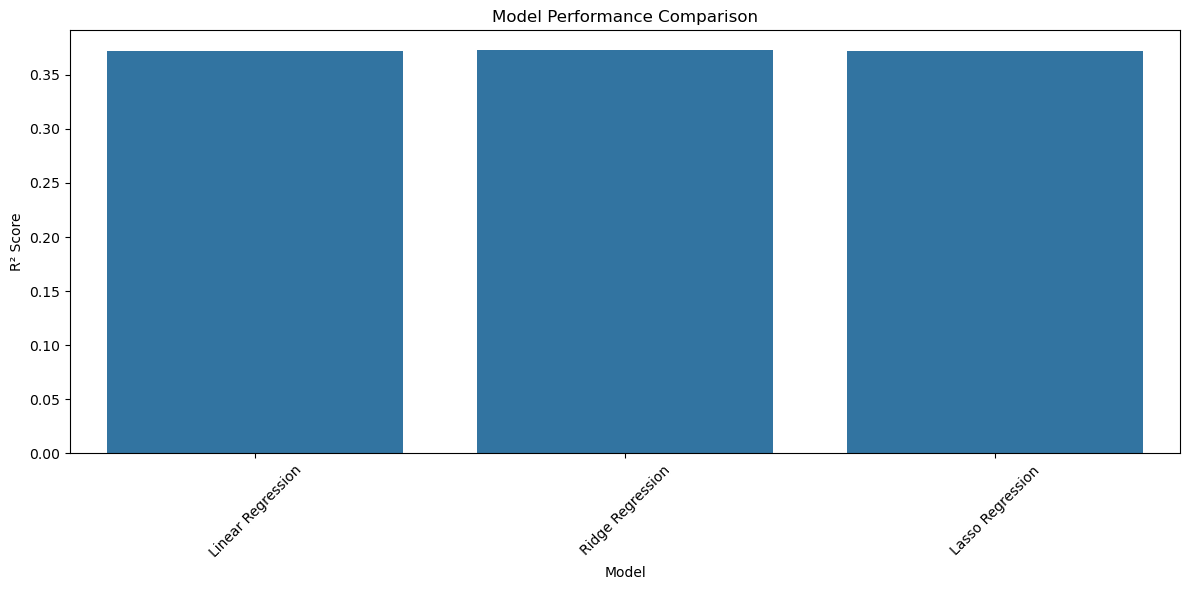

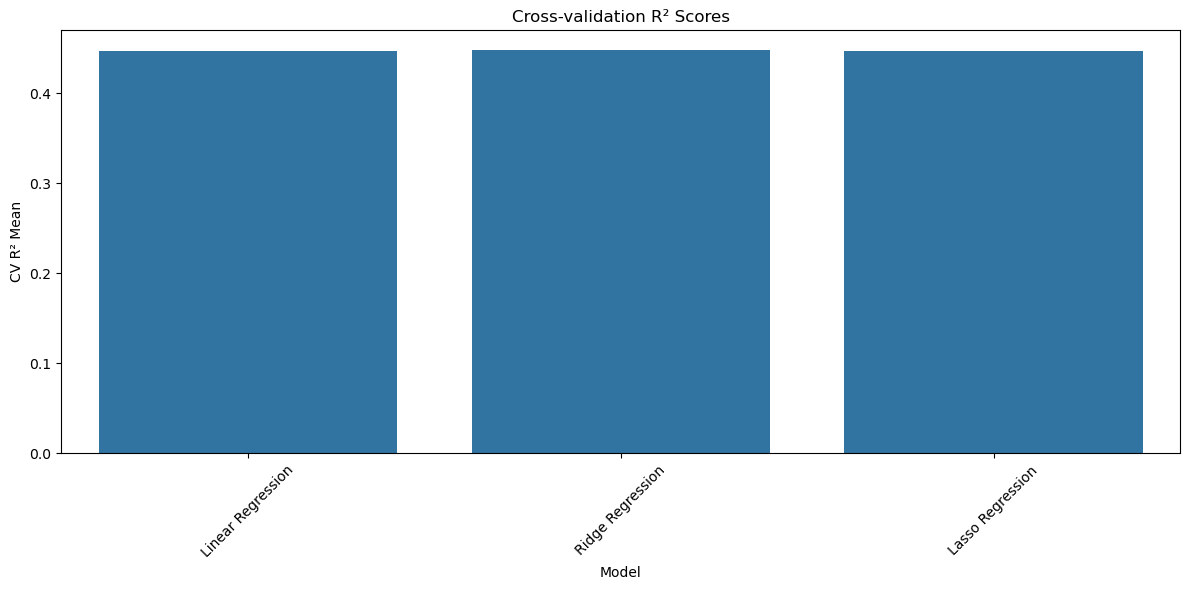

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

print("\nTraining and evaluating models...")
# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })
    
    # Print coefficients
    if name == 'Linear Regression':
        coefficients = pd.DataFrame({
            'Feature': features,
            'Coefficient': model.coef_
        })
        print("\nFeature Coefficients:")
        print(coefficients.sort_values('Coefficient', ascending=False))
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='CV R² Mean', data=results_df)
plt.title('Cross-validation R² Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

print("Engineering features...")
# Advanced feature engineering
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Bathrooms_per_Bedroom'] = df['Total_Bathrooms'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Bedroom'] = df['Fin_sqft'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Story'] = df['Fin_sqft'] / df['Stories'].replace(0, 1)
df['Lot_to_Sqft_Ratio'] = df['Lotsize'] / df['Fin_sqft']
df['Age_Squared'] = df['Property_Age'] ** 2
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])

# Select features
features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories',
    'Price_per_sqft', 'Bathrooms_per_Bedroom', 'Sqft_per_Bedroom', 'Sqft_per_Story',
    'Lot_to_Sqft_Ratio', 'Age_Squared', 'Log_Sqft', 'Log_Lotsize'
]
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Adding polynomial features...")
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Training models...")
# Initialize models
models = {
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance from XGBoost
if 'XGBoost' in models:
    xgb_model = models['XGBoost']
    importances = xgb_model.feature_importances_
    feature_names = poly.get_feature_names_out(features)
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
    

Loading data...
Cleaning data...
Engineering features...
Splitting data...
Scaling features...
Adding polynomial features...
Training models...

Training XGBoost...
RMSE: 513436.45
R² Score: 0.7690
Cross-validation R²: 0.8820 (±0.0557)

Training Random Forest...
